In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

%matplotlib inline

seed = 42
np.random.seed(seed)

#Loading data
df0     = pd.read_csv("data/heart_disease_all14.csv")
display(df0.head())

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [30]:
#Total number of records
n_records = len(df0)
#Number of infected
n_infected = len(df0[df0.num > 0])
#Number of healthy
n_healthy = len(df0[df0.num == 0])
#Percentage of infected patients
greater_percent = float(n_infected) / n_records * 100.0

# Print the results
print("Total number of records: {}".format(n_records))
print("Number of infected patients: {}".format(n_infected))
print("Number of healthy patients: {}".format(n_healthy))
print("Percentage of infected patients: {0:.2f}%".format(greater_percent))

Total number of records: 299
Number of infected patients: 139
Number of healthy patients: 160
Percentage of infected patients: 46.49%


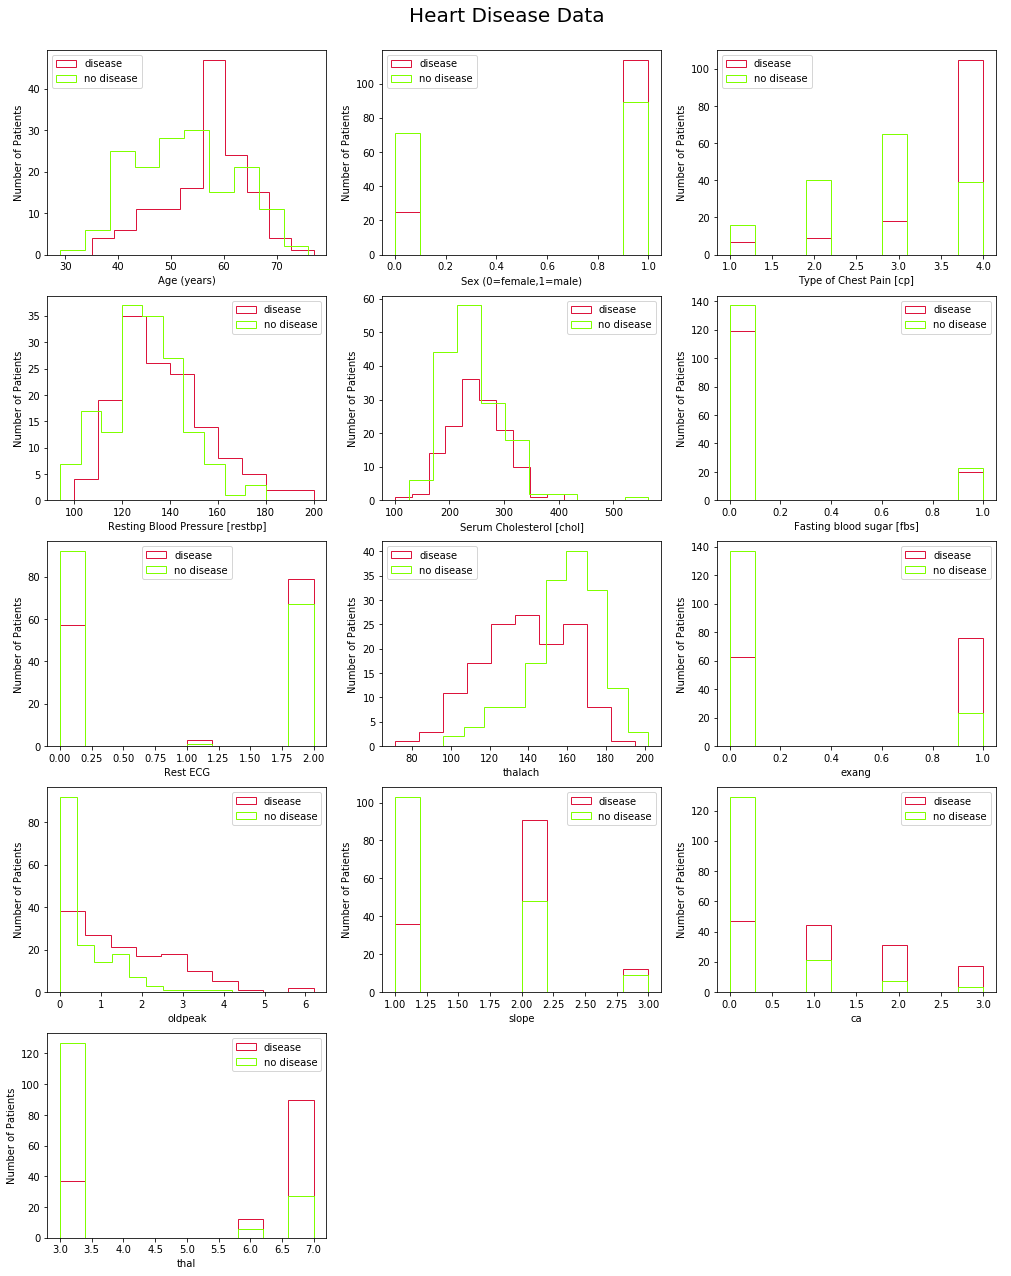

In [31]:
# Import supplementary visualizations code visuals.py
import visuals as vs

vs.plot_data(df0)

## Preparing the Data

In [32]:
# Split the data into features and target label
diag_raw = df0['num']
features_raw = df0.drop('num', axis = 1)

# Display a description of the dataset
display(features_raw.describe())

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


### Normalizing Numerical Features

In [33]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'restbp', 'chol', 'thalach', 'oldpeak', 'ca']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.0,0.481132,0.286638,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0
1,0.791667,1.0,4.0,0.622642,0.400862,0.0,2.0,0.282443,1.0,0.241935,2.0,1.000000,3.0
2,0.791667,1.0,4.0,0.245283,0.278017,0.0,2.0,0.442748,1.0,0.419355,2.0,0.666667,7.0
3,0.166667,1.0,3.0,0.339623,0.323276,0.0,0.0,0.885496,0.0,0.564516,3.0,0.000000,3.0
4,0.250000,0.0,2.0,0.339623,0.224138,0.0,2.0,0.770992,0.0,0.225806,1.0,0.000000,3.0


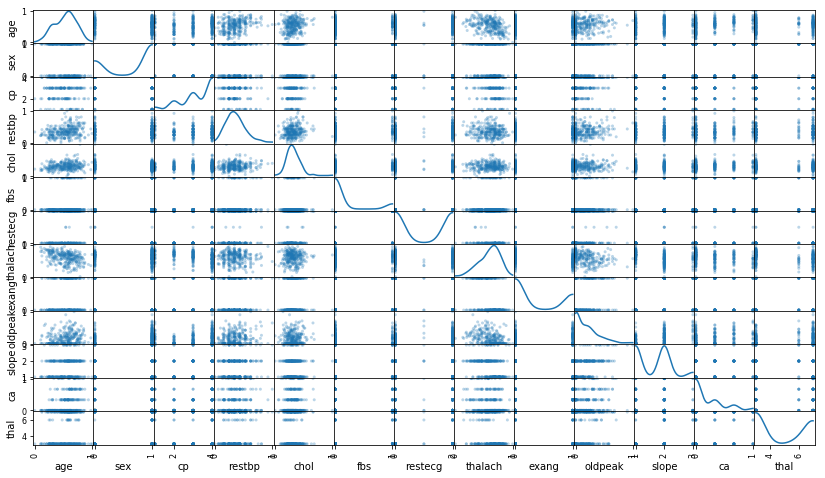

In [34]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(features_minmax_transform, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [35]:
# One-hot encode the 'features_minmax_transform' data using pandas.get_dummies() for categorical variables with 
# more than two values.
# Note that variable ca is discrete but not categorical, so we don't convert it.
features_final = pd.get_dummies(features_minmax_transform, columns=['cp', 'restecg', 'slope', 'thal'])

# Encode the 'diag_raw' data to numerical values
diag = diag_raw.apply(lambda x: 1 if x > 0 else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Encoded feature names
print(encoded)

display(features_final.head(n = 1))

22 total features after one-hot encoding.
['age', 'sex', 'restbp', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']


,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.708333,1.0,0.481132,0.286638,1.0,0.603053,0.0,0.370968,0.0,1,...,0,0,0,1,0,0,1,0,1,0


### Shuffle and Split Data

In [36]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    diag, 
                                                    test_size = 0.1, 
                                                    random_state = seed)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 269 samples.
Testing set has 30 samples.


### Neural Network Model

In [37]:
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint  


# baseline model
def create_baseline():
    model = Sequential()
    model.add(Dense(22, activation='relu', input_dim=22)) #16 , activation='relu'
    model.add(Dropout(0.3))
    model.add(Dense(8)) #5 -> 22
    model.add(Dense(1, activation='sigmoid'))
    
    # Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
    model.compile(loss='mean_squared_error', #mean_squared_error
              optimizer='rmsprop', #'rmsprop',
              metrics=['accuracy'])
    return model

def mlp(X, y, X_test, y_test):
    checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, 
                                   save_best_only=True)
    model = create_baseline()
    model.summary()
    model.fit(X, y, 
              batch_size=4,
              epochs=100,
              validation_split=.01,
              verbose=2, 
              shuffle=True,
              callbacks=[checkpointer])

    # load the weights that yielded the best validation accuracy
    model.load_weights('MLP.weights.best.hdf5')

    score = model.evaluate(X_test, y_test, verbose=0)
    print("Testing accuracy: %0.2f" % score[1])

mlp(X_train.values, y_train.values, X_test.values, y_test.values)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 22)                506       
_________________________________________________________________
dropout_5 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 184       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 699.0
Trainable params: 699.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 266 samples, validate on 3 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 0.23204, saving model to MLP.weights.best.hdf5
1s - loss: 0.1712 - acc: 0.7782 - val_loss: 0.2320 - val_acc: 0.6667
Epoch 2/100
Epoch 00001: val_loss did not improve
0s - 

### Model Evaluation

In [38]:
# features_final, diag
#from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import f1_score, accuracy_score

def stack_classifier(X, y):
    clf1 = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=5, weights='distance')
    clf2 = RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=seed)
    clf3 = GaussianNB()
    clf4 = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=seed)
    clf5 = SVC(kernel='linear', C = 10, gamma = 0.001, probability=True)
    clf6 = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.1, random_state=seed)
    estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=4, verbose=0)
    lr = LogisticRegression(C=10.0, random_state=seed)
    sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5, clf6], 
                              use_probas=True,
                              average_probas=True,
                              meta_classifier=lr)

    print('3-fold cross validation:\n')

    for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, sclf],   
                          ['KNN', 
                           'Random Forest', 
                           'Naive Bayes',
                           'Gradient Boosting',
                           'SVC',
                           'AdaBoost',
                           'StackingClassifier']):

        #scores = model_selection.cross_val_score(clf, X_train, y_train, 
        #                                          cv=5, scoring='accuracy')
        scores = cross_validate(clf, X, y, scoring=['accuracy', 'f1'],
                                               cv=5)
        #print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
        #      % (scores.mean(), scores.std(), label))

        print("[%s]" % label)
        print("Validation Accuracy: %0.2f (+/- %0.2f), F1: %0.2f (+/- %0.2f)" 
              % (scores['test_accuracy'].mean(), scores['test_accuracy'].std(), scores['test_f1'].mean(), scores['test_f1'].std()))

        #Testing
        prediction_test = clf.fit(X_train.values, y_train.values).predict(X_test.values);
        print("Testing Accuracy: {:.2f}, F1: {:.2f}".format(accuracy_score(y_test.values, prediction_test), 
                                                            f1_score(y_test.values, prediction_test)))

stack_classifier(X_train.values, y_train.values)

3-fold cross validation:

[KNN]
Validation Accuracy: 0.83 (+/- 0.01), F1: 0.82 (+/- 0.02)
Testing Accuracy: 0.90, F1: 0.88
[Random Forest]
Validation Accuracy: 0.78 (+/- 0.07), F1: 0.77 (+/- 0.06)
Testing Accuracy: 0.83, F1: 0.78
[Naive Bayes]
Validation Accuracy: 0.84 (+/- 0.02), F1: 0.82 (+/- 0.02)
Testing Accuracy: 0.90, F1: 0.88
[Gradient Boosting]
Validation Accuracy: 0.79 (+/- 0.06), F1: 0.78 (+/- 0.08)
Testing Accuracy: 0.90, F1: 0.87
[SVC]
Validation Accuracy: 0.81 (+/- 0.06), F1: 0.78 (+/- 0.08)
Testing Accuracy: 0.90, F1: 0.87
[AdaBoost]
Validation Accuracy: 0.82 (+/- 0.04), F1: 0.80 (+/- 0.05)
Testing Accuracy: 0.87, F1: 0.83
[StackingClassifier]
Validation Accuracy: 0.83 (+/- 0.03), F1: 0.81 (+/- 0.04)
Testing Accuracy: 0.90, F1: 0.88


### Grid Search


In [39]:
from sklearn.model_selection import GridSearchCV

params = {#'kneighborsclassifier__n_neighbors': [1, 5, 10, 20, 100],
          #'kneighborsclassifier__weights': ['uniform', 'distance'],
          #'kneighborsclassifier__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
          #'randomforestclassifier__n_estimators': [5, 50, 100],
          #'randomforestclassifier__criterion': ['gini', 'entropy'],
          #'randomforestclassifier__max_features': ['auto', 'log2', None],
          #'meta-logisticregression__C': [0.1, 10.0],
          #'meta-logisticregression__class_weight': [None, 'balanced']
          #'adaboostclassifier__n_estimators': [5, 50, 100],
          #'adaboostclassifier__learning_rate': [0.1, 0.5, 1.0],
          #'adaboostclassifier__algorithm': ['SAMME', 'SAMME.R']
          #'gradientboostingclassifier__loss': ['deviance', 'exponential'],
          #'gradientboostingclassifier__learning_rate': [0.1, 0.5, 1.0],
          #'gradientboostingclassifier__n_estimators': [5, 50, 100, 200],
          #'gradientboostingclassifier__max_depth': [1, 3, 5, 7, 9]
          'classifiers': [(clf1, clf1, clf1), (clf1, clf2, clf3), (clf3, clf4, clf5, clf6), (clf3, clf5, clf6), (clf4, clf6), 
                          (clf1, clf4)]
         }

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X_train, y_train)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.829 +/- 0.01 {'classifiers': (KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'), KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'), KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'))}
0.848 +/- 0.01 {'classifiers': (KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_sa

### Using PCA

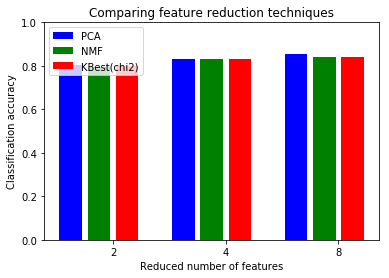

In [40]:
#from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', lr)
])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(features_minmax_transform, diag)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
#pca = PCA(n_components=8)
#pca.fit(X_train)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)
#print(pca.components_)

### Removing outliers

In [41]:
# For each feature find the data points with extreme high or low values
for feature in features_minmax_transform.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(features_minmax_transform[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(features_minmax_transform[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(features_minmax_transform[~((features_minmax_transform[feature] >= Q1 - step) & (features_minmax_transform[feature] <= Q3 + step))])

# Select the indices for data points you wish to remove
outliers  = [0, 21, 123, 149, 181, 193, 14, 83, 125, 210, 48, 120, 117, 145, 174, 177, 190]

# Remove the outliers, if any were specified
good_features = features_minmax_transform.drop(features_minmax_transform.index[outliers]).reset_index(drop = True)    
good_diag = diag.drop(diag.index[outliers]).reset_index(drop = True)    
print(good_features.shape)
print(good_diag.shape)

Data points considered outliers for the feature 'age':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal


Data points considered outliers for the feature 'sex':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal


Data points considered outliers for the feature 'cp':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.0,0.481132,0.286638,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0
20,0.729167,1.0,1.0,0.150943,0.239224,0.0,2.0,0.557252,1.0,0.290323,2.0,0.000000,3.0
21,0.604167,0.0,1.0,0.528302,0.394397,1.0,2.0,0.694656,0.0,0.161290,1.0,0.000000,3.0
27,0.770833,0.0,1.0,0.528302,0.271552,0.0,0.0,0.328244,0.0,0.419355,3.0,0.000000,3.0
30,0.833333,0.0,1.0,0.433962,0.299569,0.0,0.0,0.610687,0.0,0.290323,1.0,0.666667,3.0
41,0.229167,1.0,1.0,0.433962,0.213362,0.0,0.0,0.816794,1.0,0.225806,1.0,0.000000,7.0
59,0.458333,1.0,1.0,0.292453,0.243534,0.0,2.0,0.412214,1.0,0.225806,1.0,0.333333,3.0
100,0.104167,1.0,1.0,0.226415,0.176724,0.0,2.0,0.786260,0.0,0.000000,1.0,0.000000,3.0
111,0.479167,1.0,1.0,0.226415,0.185345,0.0,2.0,0.908397,0.0,0.000000,2.0,0.000000,6.0
123,0.750000,1.0,1.0,0.415094,0.392241,1.0,2.0,0.786260,0.0,0.225806,2.0,0.333333,3.0


Data points considered outliers for the feature 'restbp':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,0.479167,1.0,3.0,0.735849,0.213362,1.0,0.0,0.694656,0.0,0.080645,1.0,0.000000,7.0
83,0.812500,1.0,3.0,0.811321,0.375000,1.0,2.0,0.603053,1.0,0.258065,2.0,0.000000,7.0
125,0.562500,0.0,4.0,1.000000,0.405172,1.0,2.0,0.473282,1.0,0.645161,3.0,0.666667,7.0
170,0.625000,0.0,4.0,0.754717,0.321121,0.0,0.0,0.549618,1.0,0.000000,2.0,0.000000,3.0
181,0.625000,1.0,1.0,0.792453,0.366379,0.0,2.0,0.564885,0.0,0.677419,3.0,0.000000,7.0
186,0.520833,1.0,2.0,0.924528,0.394397,0.0,2.0,0.946565,0.0,0.000000,1.0,0.333333,7.0
198,0.729167,0.0,4.0,0.811321,0.484914,0.0,0.0,0.633588,1.0,0.000000,1.0,0.000000,3.0
210,0.770833,0.0,4.0,0.792453,0.275862,1.0,0.0,0.717557,1.0,0.161290,2.0,0.666667,7.0
228,0.541667,0.0,4.0,0.811321,0.489224,0.0,1.0,0.351145,1.0,0.548387,2.0,0.000000,3.0


Data points considered outliers for the feature 'chol':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
48,0.750000,0.0,3.0,0.433962,0.683190,1.0,2.0,0.656489,0.0,0.129032,1.0,0.333333,3.0
120,0.708333,0.0,4.0,0.528302,0.661638,0.0,2.0,0.633588,0.0,0.645161,2.0,1.000000,7.0
151,0.791667,0.0,3.0,0.198113,1.000000,0.0,2.0,0.679389,0.0,0.258065,2.0,0.000000,7.0
171,0.687500,0.0,4.0,0.433962,0.633621,0.0,2.0,0.656489,0.0,0.193548,2.0,0.000000,3.0
179,0.562500,0.0,4.0,0.377358,0.665948,0.0,2.0,0.603053,1.0,0.306452,2.0,0.666667,7.0
298,0.562500,1.0,4.0,0.245283,0.000000,0.0,0.0,0.374046,1.0,0.241935,2.0,0.000000,7.0


Data points considered outliers for the feature 'fbs':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.0,0.481132,0.286638,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0
9,0.500000,1.0,4.0,0.433962,0.221983,1.0,2.0,0.641221,1.0,0.500000,3.0,0.000000,7.0
12,0.562500,1.0,3.0,0.339623,0.336207,1.0,2.0,0.541985,1.0,0.096774,2.0,0.333333,6.0
14,0.479167,1.0,3.0,0.735849,0.213362,1.0,0.0,0.694656,0.0,0.080645,1.0,0.000000,7.0
21,0.604167,0.0,1.0,0.528302,0.394397,1.0,2.0,0.694656,0.0,0.161290,1.0,0.000000,3.0
31,0.645833,1.0,4.0,0.216981,0.280172,1.0,0.0,0.679389,1.0,0.225806,1.0,0.666667,7.0
39,0.666667,1.0,3.0,0.528302,0.308190,1.0,0.0,0.503817,1.0,0.161290,2.0,0.000000,3.0
43,0.625000,1.0,3.0,0.528302,0.241379,1.0,0.0,0.656489,0.0,0.258065,1.0,0.000000,3.0
48,0.750000,0.0,3.0,0.433962,0.683190,1.0,2.0,0.656489,0.0,0.129032,1.0,0.333333,3.0
49,0.500000,1.0,3.0,0.339623,0.209052,1.0,2.0,0.618321,0.0,0.193548,3.0,0.000000,3.0


Data points considered outliers for the feature 'restecg':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal


Data points considered outliers for the feature 'thalach':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
242,0.791667,1.0,4.0,0.245283,0.295259,0.0,0.0,0.0,0.0,0.16129,2.0,0.0,3.0


Data points considered outliers for the feature 'exang':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal


Data points considered outliers for the feature 'oldpeak':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
90,0.687500,0.0,4.0,0.622642,0.137931,0.0,2.0,0.564885,0.0,1.000000,3.0,1.0,7.0
122,0.541667,1.0,4.0,0.433962,0.252155,0.0,0.0,0.305344,1.0,0.903226,3.0,0.0,7.0
181,0.625000,1.0,1.0,0.792453,0.366379,0.0,2.0,0.564885,0.0,0.677419,3.0,0.0,7.0
189,0.458333,1.0,4.0,0.433962,0.426724,0.0,0.0,0.389313,1.0,0.677419,2.0,1.0,7.0
281,0.604167,1.0,4.0,0.188679,0.469828,0.0,1.0,0.526718,0.0,0.709677,3.0,1.0,6.0


Data points considered outliers for the feature 'slope':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal


Data points considered outliers for the feature 'ca':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,0.791667,1.0,4.0,0.622642,0.400862,0.0,2.0,0.282443,1.0,0.241935,2.0,1.0,3.0
40,0.750000,0.0,4.0,0.528302,0.269397,0.0,2.0,0.328244,0.0,0.161290,2.0,1.0,7.0
62,0.604167,1.0,4.0,0.320755,0.250000,0.0,2.0,0.458015,1.0,0.354839,2.0,1.0,7.0
90,0.687500,0.0,4.0,0.622642,0.137931,0.0,2.0,0.564885,0.0,1.000000,3.0,1.0,7.0
91,0.687500,1.0,3.0,0.339623,0.282328,0.0,0.0,0.572519,0.0,0.290323,2.0,1.0,7.0
103,0.416667,1.0,3.0,0.245283,0.189655,0.0,0.0,0.519084,0.0,0.322581,2.0,1.0,7.0
117,0.708333,1.0,4.0,0.339623,0.495690,1.0,2.0,0.465649,1.0,0.290323,1.0,1.0,7.0
120,0.708333,0.0,4.0,0.528302,0.661638,0.0,2.0,0.633588,0.0,0.645161,2.0,1.0,7.0
145,0.583333,1.0,4.0,0.669811,0.407328,1.0,2.0,0.404580,0.0,0.161290,2.0,1.0,7.0
154,0.854167,1.0,4.0,0.339623,0.478448,0.0,2.0,0.290076,0.0,0.387097,2.0,1.0,3.0


Data points considered outliers for the feature 'thal':


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal


(282, 13)
(282,)


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8
0,-1.304853,-1.584166,-0.728249,0.390852,-0.744397,0.147194,0.425215,-0.693129
1,2.554574,-1.135694,-0.048850,0.104996,-0.265368,0.219139,0.122040,-0.339831
2,-1.567451,0.643822,-0.540329,1.501841,-0.276340,-0.813004,-0.273939,0.090032
3,-2.003229,-0.571685,1.240269,-0.296670,0.463668,0.356320,-0.184642,0.082077
4,-1.944388,1.258624,0.512654,-0.228122,-0.383808,-0.177755,-0.086150,-0.060311


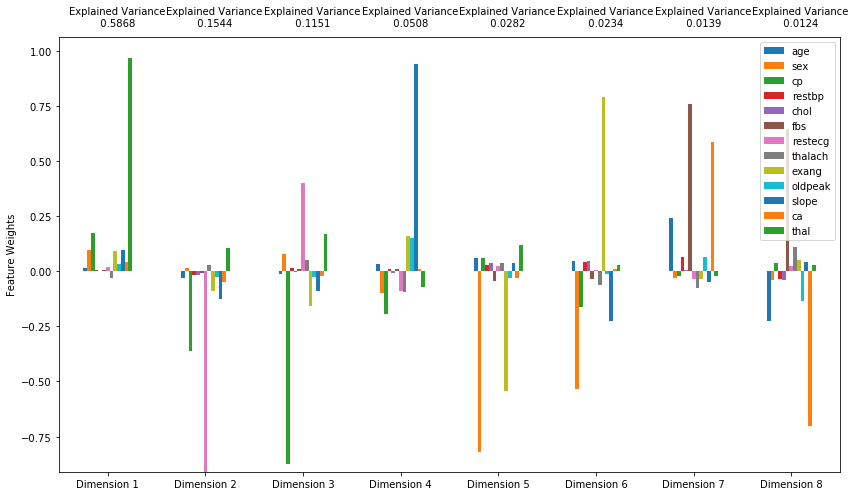

In [45]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good features
pca = PCA(n_components=8)
pca.fit(good_features)

# Generate PCA results plot
pca_results = vs.pca_results(good_features, pca)

# Transform features using the PCA fit above
reduced_data = pca.transform(good_features)
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'
                                                    , 'Dimension 5', 'Dimension 6', 'Dimension 7', 'Dimension 8'])
reduced_data.head()

### Apply learning algorithms on the reduced data

In [46]:
# Split the 'features' and 'income' data into training and testing sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(reduced_data, 
                                                            good_diag, 
                                                            test_size = 0.1, 
                                                            random_state = seed)

# Show the results of the split
print("Training set has {} samples.".format(X_train_r.shape[0]))
print("Testing set has {} samples.".format(X_test_r.shape[0]))
#reduced_data, good_diag
stack_classifier(X_train_r, y_train_r)

Training set has 253 samples.
Testing set has 29 samples.
3-fold cross validation:

[KNN]
Validation Accuracy: 0.82 (+/- 0.04), F1: 0.81 (+/- 0.04)
Testing Accuracy: 0.90, F1: 0.88
[Random Forest]
Validation Accuracy: 0.82 (+/- 0.04), F1: 0.80 (+/- 0.05)
Testing Accuracy: 0.83, F1: 0.78
[Naive Bayes]
Validation Accuracy: 0.78 (+/- 0.07), F1: 0.76 (+/- 0.07)
Testing Accuracy: 0.90, F1: 0.88
[Gradient Boosting]
Validation Accuracy: 0.85 (+/- 0.02), F1: 0.83 (+/- 0.02)
Testing Accuracy: 0.90, F1: 0.87
[SVC]
Validation Accuracy: 0.84 (+/- 0.03), F1: 0.82 (+/- 0.04)
Testing Accuracy: 0.90, F1: 0.87
[AdaBoost]
Validation Accuracy: 0.84 (+/- 0.01), F1: 0.81 (+/- 0.02)
Testing Accuracy: 0.87, F1: 0.83
[StackingClassifier]
Validation Accuracy: 0.87 (+/- 0.02), F1: 0.86 (+/- 0.03)
Testing Accuracy: 0.90, F1: 0.88


In [58]:
# baseline model
def create_baseline():
    model = Sequential()
    model.add(Dense(22, activation='relu', input_dim=8)) #16 , activation='relu'
    model.add(Dropout(0.3))
    model.add(Dense(8)) #5 -> 22
    model.add(Dense(1, activation='sigmoid'))
    
    # Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
    model.compile(loss='mean_squared_error', #mean_squared_error
              optimizer='rmsprop', #'rmsprop',
              metrics=['accuracy'])
    return model

mlp(X_train_r.values, y_train_r.values, X_test_r.values, y_test_r.values)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 22)                198       
_________________________________________________________________
dropout_13 (Dropout)         (None, 22)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 184       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 9         
Total params: 391.0
Trainable params: 391.0
Non-trainable params: 0.0
_________________________________________________________________
Train on 250 samples, validate on 3 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 0.20271, saving model to MLP.weights.best.hdf5
3s - loss: 0.2441 - acc: 0.5840 - val_loss: 0.2027 - val_acc: 1.0000
Epoch 2/100
Epoch 00001: val_loss improved from 0.20271